# Creating training data from cytopacq simulated nuclei images

In this notebook we create training data for deep learning by loading simulated images created by cytopacq[https://cbia.fi.muni.cz/simulator/index.php] then applying blur and noise operators (to create corrupted input images)

## Point Spread Function (PSF) generation and Image Simulation

We will calculate the PSF, which represents the blurring effect caused by the microscope's optical system. The PSF will be computed based on the microscope's parameters such as magnification, numerical aperture, and focal length.

Convolution with the PSF: The generated 3D image will be convolved with the PSF to simulate the blurring effect of the microscope on the true signal.

Photon shot noise addition: Photon shot noise arises due to the discrete nature of light and affects the number of photons detected by the camera. We will introduce photon shot noise into the convolved image to mimic this stochastic effect.

Cavaets: Please note that this example focuses on the generation of a 3D image, PSF calculation, convolution with the PSF, and addition of photon shot noise. Other aspects, such as optical aberrations, sample interactions, camera characteristics, sensor noise, and post-processing steps, are not considered in this simplified simulation. These additional factors can significantly impact the image quality and should be taken into account for comprehensive microscopy simulations.

## Import dependant libraries

... and define location to put ground truths and images

In [1]:
from tnia.simulation.phantoms import add_sphere3d
from tnia.plotting.projections import show_xy_zy_max, show_xy_zy_slice
from tnia.simulation.phantoms import add_small_to_large
import numpy as np
import random
import raster_geometry as rg
from skimage.io import imsave
from tnia.deconvolution.forward import forward
import os

data_path =r'../../data/deep learning training'

# can be big, small, or big_small
noise = 'high'
na = 'high'

set_name = 'test3_cytopacq_noise_'+noise+'_na_'+na
print(set_name)
# path to put training data
truth_path = os.path.join(data_path, set_name, 'train', 'ground truth0')
image_path = os.path.join(data_path, set_name, 'train', 'input0')

if not os.path.exists(truth_path):
    os.makedirs(truth_path)
if not os.path.exists(image_path):
    os.makedirs(image_path)

test3_cytopacq_noise_high_na_high


## Create PSF used for simulation

high NA
1.0


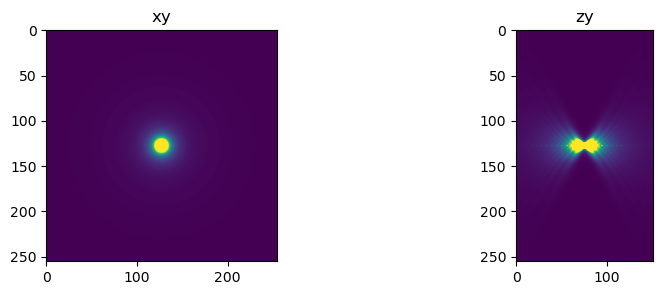

In [2]:
from tnia.deconvolution.psfs import gibson_lanni_3D

# scope parameters
if na == 'high':
    print('high NA')
    ni=1.5
    ns  = 1.33
    NA=1.4
else:
    print('low NA')
    ni=1
    ns= 1
    NA=0.7
w=0.530

# spacings
xy_spacing = .1
z_spacing= .1

#depth to compute PSF this can be used to compute a PSF that has aberrations
#note stil need to confirm the sign of the depth, the negative sign is used to reproduce the experimental PSF
d=0

xy_psf_dim=255
z_psf_dim=151

psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_psf_dim, d, w, use_psfm=True)
psf = psf.astype('float32')

psf=psf/psf.sum()

fig=show_xy_zy_max(psf, vmax=psf.max()/100)
print(psf.sum())


## Load cytopacq phantom and apply imaging system

In this block we create a set of phantoms, populate them with random spheres, apply the imaging model to them (convolution + Poisson noise), then save them.  

In [3]:

cyto_path  = os.path.join(data_path,'cytopacq/ground truth')
print(cyto_path)
print(truth_path)
print(image_path)

../../data/deep learning training\cytopacq/ground truth
../../data/deep learning training\test3_cytopacq_noise_high_na_high\train\ground truth0
../../data/deep learning training\test3_cytopacq_noise_high_na_high\train\input0


In [4]:
import os
from pathlib import Path
from skimage.io import imread, imsave
truth_path = Path(truth_path)
image_path = Path(image_path)

# get list of all images
from glob import glob
image_list = glob(cyto_path + '/*.tif')

if noise == 'low':
    print('low noise')
    gain = 10
else:
    print('high noise')
    gain = 0.5

gpu = False

for full_image_name in image_list:
    print(full_image_name)
    # open image
    phantom = imread(full_image_name)
 
    phantom = phantom*gain
    phantom_forward = forward(phantom, psf, 10, True, gpu=gpu)
    
    fig=show_xy_zy_max(phantom, figsize=(7,5))
    fig = show_xy_zy_max(phantom_forward, figsize=(7,5))

    image_name = os.path.basename(full_image_name)
    
    imsave(truth_path / image_name, phantom)
    imsave(image_path / image_name, phantom_forward)

high noise
../../data/deep learning training\cytopacq/ground truth\phantom (2).tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_19076\1746658679.py:34: UserWarning: C:\Users\bnort\work\ImageJ2022\tnia\deconvolution-gpu-dl-course\data\deep learning training\test3_cytopacq_noise_high_na_high\train\input0\phantom (2).tif is a low contrast image
  imsave(image_path / image_name, phantom_forward)


../../data/deep learning training\cytopacq/ground truth\phantom (3).tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_19076\1746658679.py:34: UserWarning: C:\Users\bnort\work\ImageJ2022\tnia\deconvolution-gpu-dl-course\data\deep learning training\test3_cytopacq_noise_high_na_high\train\input0\phantom (3).tif is a low contrast image
  imsave(image_path / image_name, phantom_forward)


../../data/deep learning training\cytopacq/ground truth\phantom (4).tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_19076\1746658679.py:34: UserWarning: C:\Users\bnort\work\ImageJ2022\tnia\deconvolution-gpu-dl-course\data\deep learning training\test3_cytopacq_noise_high_na_high\train\input0\phantom (4).tif is a low contrast image
  imsave(image_path / image_name, phantom_forward)


../../data/deep learning training\cytopacq/ground truth\phantom (5).tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_19076\1746658679.py:34: UserWarning: C:\Users\bnort\work\ImageJ2022\tnia\deconvolution-gpu-dl-course\data\deep learning training\test3_cytopacq_noise_high_na_high\train\input0\phantom (5).tif is a low contrast image
  imsave(image_path / image_name, phantom_forward)


../../data/deep learning training\cytopacq/ground truth\phantom (6).tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_19076\1746658679.py:34: UserWarning: C:\Users\bnort\work\ImageJ2022\tnia\deconvolution-gpu-dl-course\data\deep learning training\test3_cytopacq_noise_high_na_high\train\input0\phantom (6).tif is a low contrast image
  imsave(image_path / image_name, phantom_forward)


../../data/deep learning training\cytopacq/ground truth\phantom (7).tif


In [10]:
import napari
viewer = napari.Viewer()
viewer.add_image(phantom)
viewer.add_image(phantom_forward)

<Image layer 'phantom_forward' at 0x19240dba700>

In [53]:
phantom_forward_sub.shape

(86, 256, 256)